# Dataset Preparation

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
dataset = pd.read_csv('Data.csv')
print(len(dataset))
dataset.head()

6335


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Pre-Processing

In [3]:
# Importing the libraries that we are using for pre-processing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

corpus = []

for i in range(0,6335): 
  # Replace non-letters and punctuation with letters
  content = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
  # To make all letters lowercase
  content = content.lower()
  # Split each piece of content into its word
  content = content.split()
  # Creating an instance of PorterStemmer class
  ps = PorterStemmer()
  # Creating a list of all nltk stopwords
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  # Setting content equal to stemmed words and removing all stopwords
  content = [ps.stem(word) for word in content if not word in set(all_stopwords)]
  # Joining the seperated pieces of string into one string
  content = ' '.join(content)
  # Adding that processed string to the corpus
  corpus.append(content)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rodinsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Feature Extraction

In [4]:
# Importing library required for bag-of-words (Bow) model
from sklearn.feature_extraction.text import CountVectorizer

# Creating an instance of the CountVectorizer() class
cv = CountVectorizer() # As one of the parameters, you could set a limit on the most frequently appeared words
# Setting X, the indepent variable, equal to the list corpus that is transformed into numerical vector after BoW model
X = cv.fit_transform(corpus).toarray()
# Setting y, the dependent variable, equal to the last column of the dataset, which includes strings stating "FAKE" or "REAL"
y = dataset.iloc[:,-1].values

In [5]:
# Strings cannot be used in ML, therefore "FAKE" and "REAL" have to be transformed to 0 and 1.
# The lines below basiclly achieve that.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 1 ... 0 1 1]


In [6]:
# Splitting the dataset into 80% training data and 20% testing data using train_test_split function from Sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Defining a generalized model training and accuracy-presenting function to increase efficiency
def train_model(model):
    # Training model using training dataset
    model.fit(X_train, y_train)
    # Predicting the y variable for the testing dataset
    y_pred = model.predict(X_test)
    
    # A set of functions to illustrate the predicted results and actual results side by side
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))
    # Calculating accuracy score using predicted results and actual results
    acc = accuracy_score(y_test, y_pred)
    # Rounding accuracy score to 4 signficant figures
    acc = round(acc, 4)
    print("A fake news detection algorithm with "+str(100 * acc)+"% accuracy")

    # The code below presents a confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    plt.show()

# Model Training

## Model #1: Naive Bayes

[[1 1]
 [0 0]
 [1 0]
 ...
 [1 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 78.93% accuracy


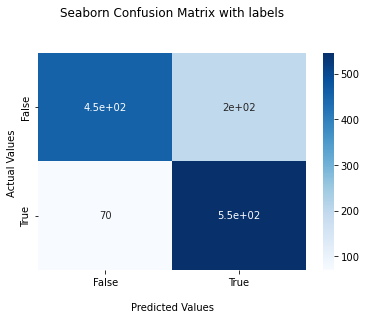

In [8]:
# Importing the necessary class for that specific model and training it using the training dataset
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
train_model(model_nb)

## Model #2: Logistic Regression

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 92.66% accuracy


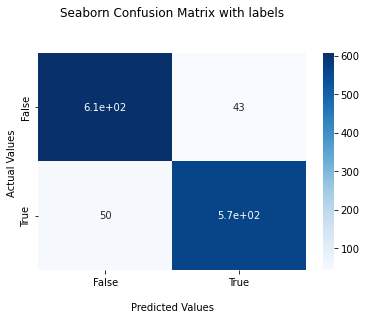

In [9]:
# Importing the necessary class for that specific model and training it using the training dataset
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=200)
train_model(model_lr)

## Model #3: Stochastic Gradient Descent Classifier

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 92.74% accuracy


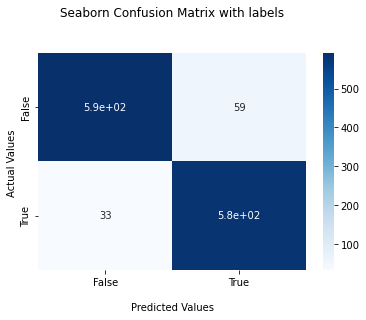

In [10]:
# Importing the necessary class for that specific model and training it using the training dataset
from sklearn.linear_model import SGDClassifier

model_sgdc = SGDClassifier(max_iter=100)
train_model(model_sgdc)

## Model #4: K-Nearest Neighbors

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 78.77% accuracy


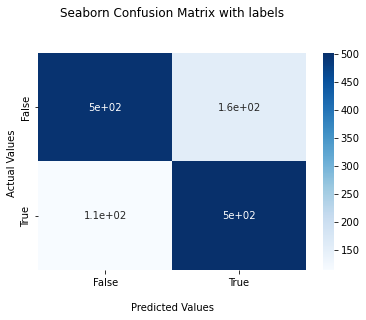

In [11]:
# Importing the necessary class for that specific model and training it using the training dataset
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
train_model(model_knn)

## Model #5: Decision Tree

[[0 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 81.14% accuracy


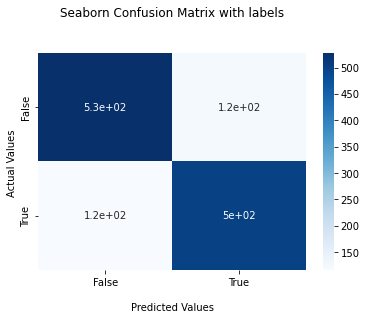

In [12]:
# Importing the necessary class for that specific model and training it using the training dataset
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
train_model(model_dt)


## Model #6: Random Forest

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 90.13% accuracy


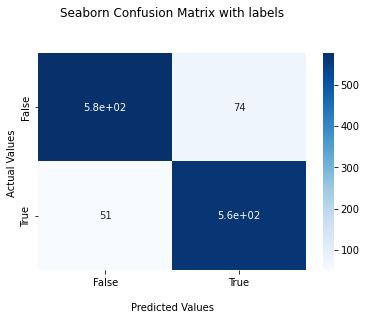

In [13]:
# Importing the necessary class for that specific model and training it using the training dataset
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
train_model(model_rf)

## Model #7: Gradient Boosting Classifier

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]
A fake news detection algorithm with 89.5% accuracy


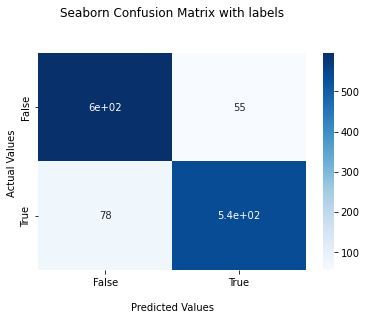

In [14]:
# Importing the necessary class for that specific model and training it using the training dataset
from sklearn.ensemble import GradientBoostingClassifier

model_gbc = GradientBoostingClassifier()
train_model(model_gbc)

# Testing Custom Examples

In [15]:
# Perform same preprocessing operations on the test input
def text_input_clean(example):
    example = re.sub('[^a-zA-Z]', ' ', example)
    example = example.lower()
    example = example.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    example = [ps.stem(word) for word in example if not word in set(all_stopwords)]
    example = ' '.join(example)
    new_corpus = [example]
    new_X_test = cv.transform(new_corpus).toarray()
    
    return new_X_test

In [16]:
text_input = ''

In [17]:
# Predicting one example
# Taking a text as input
text_input = input('Enter a piece of text: ')
new_X_test = text_input_clean(text_input)
test_y_pred = model_lr.predict(new_X_test)
print(test_y_pred)

Enter a piece of text: example
[0]
